In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### `.subplots()`
.subplots creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. Each subplot can be accessed using indexes, as if it'd be a matrix of plots.

In [46]:
x = np.linspace(-4*np.pi, +4*np.pi, num=1000)
y = np.sin(3*x)
z = np.tan(0.25*x)

Using `.subplots()` without any *kwargs yields to a single axe.

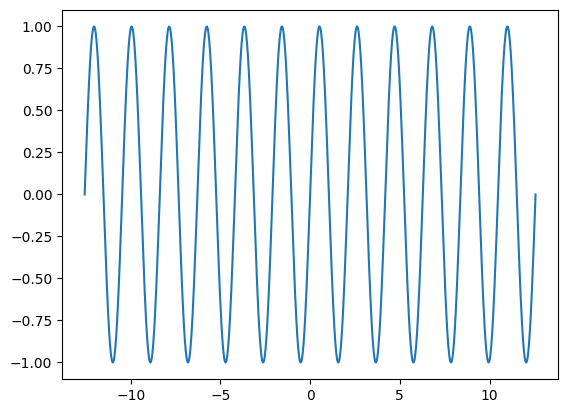

In [47]:
fig, axes = plt.subplots()
axes.plot(x,y)
fig.show()

But, when we specify the number of rows and number columns as follows, we can create multistacked plots through this method. Each plot can be easily accessed and modified:

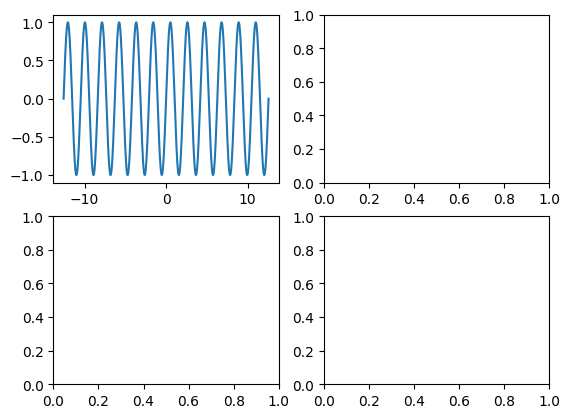

In [48]:
fig, axes = plt.subplots(nrows= 2, ncols= 2)
axes[0,0].plot(x,y) #as it happens in a matrix, we access using nrows, ncol indexing.
plt.show()

Also, we can access each plot through tuple indexing, as it follows:

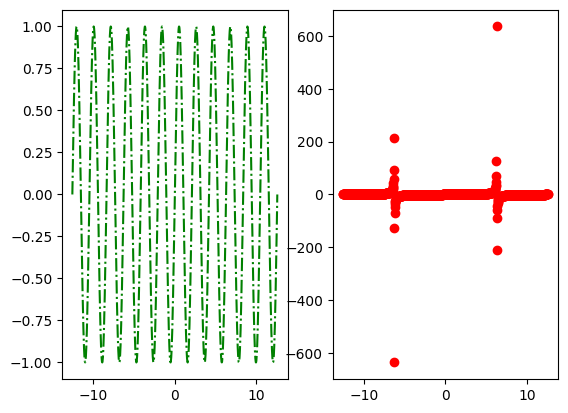

In [49]:
fig, (axes1,axes2) = plt.subplots(nrows=1, ncols=2)
axes1.plot(x,y,'g-.')
axes2.plot(x,z,'ro')
plt.show()

#### Retrieve a 4x2 fig matrix by tuple names

/tmp/ipykernel_449/60844866.py:6: RuntimeWarning: invalid value encountered in arcsin
  axes5.plot(x, np.arcsin(x), 'green')


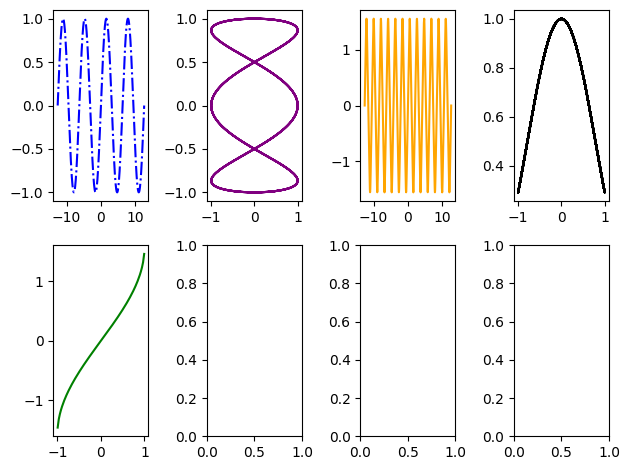

In [50]:
fig, ((axes1, axes2, axes3, axes4), (axes5, axes6, axes7, axes8)) = plt.subplots(2,4)
axes1.plot(x, np.sin(x), 'b-.')
axes2.plot(y, np.cos(x), 'purple')
axes3.plot(x, np.tan(y), 'orange')
axes4.plot(y, np.cos(y)**2,'black')
axes5.plot(x, np.arcsin(x), 'green')

fig.tight_layout()
fig.show()

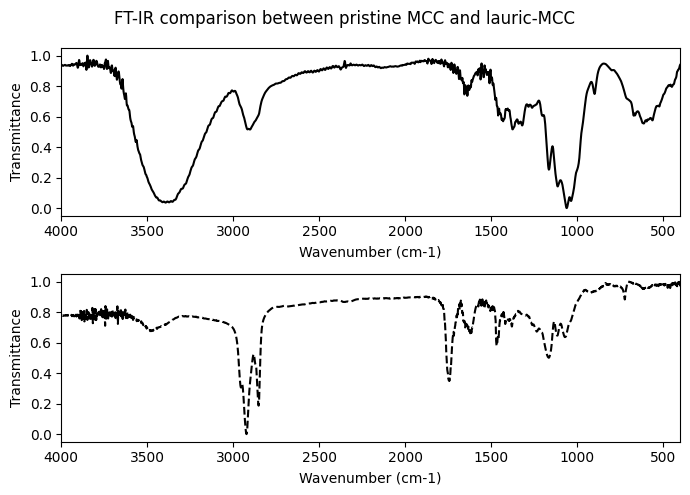

In [80]:
pristine_mcc = pd.read_csv('./pristine_mcc.csv', sep=',', header=0)
jolyg_mcc = pd.read_csv('./jolyg_mcc.csv', sep=',', header=0)

fig, (axes1, axes2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), dpi=100)
fig.suptitle('FT-IR comparison between pristine MCC and lauric-MCC')
axes1.plot(pristine_mcc['Wavelength'], pristine_mcc['Transmittance'], color='black', linestyle='-')
axes1.set_xlim(4000, 400)
axes1.set_xlabel('Wavenumber (cm-1)')
axes1.set_ylabel('Transmittance')
axes2.plot(jolyg_mcc['Wavenumber'], jolyg_mcc['Transmittance'], color='black', linestyle='--')
axes2.set_xlim(4000, 400)
axes2.set_xlabel('Wavenumber (cm-1)')
axes2.set_ylabel('Transmittance')
fig.tight_layout()
fig.show()


For subplots that are sharing axes one set of tick labels is enough. Tick labels of inner Axes are automatically removed by `.sharex` and `.sharey`. Still there remains an unused empty space between the subplots.

To precisely control the positioning of the subplots, one can explicitly create a `GridSpec` with ```Figure.add_gridspec```, and then call its subplots method. For example, we can reduce the height between vertical subplots using ```.add_gridspec(hspace=0)```.

`.label_outer` is a handy method to remove labels and ticks from subplots that are not at the edge of the grid.

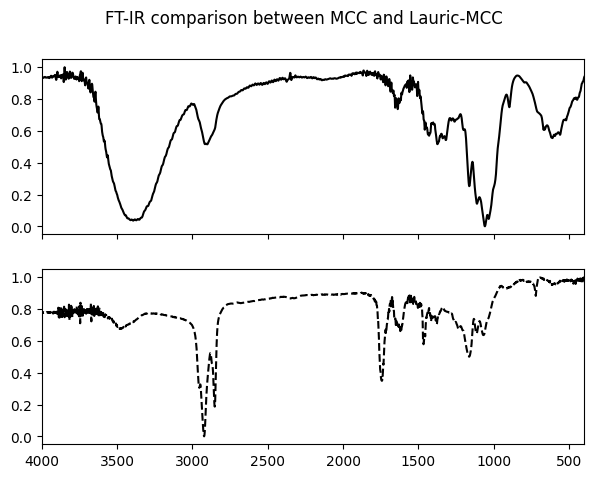

In [120]:
fig, (axes1, axes2) = plt.subplots(nrows=2, ncols=1, figsize=(7, 5), dpi=100, sharex=True, sharey=True)
fig.suptitle('FT-IR comparison between MCC and Lauric-MCC')
axes1.plot(pristine_mcc['Wavelength'], pristine_mcc['Transmittance'], color='black', linestyle='-')
axes2.plot(jolyg_mcc['Wavenumber'], jolyg_mcc['Transmittance'], color='black', linestyle='--')
axes1.set_xlim(4000, 400)
axes2.set_xlim(4000, 400)
fig.show()

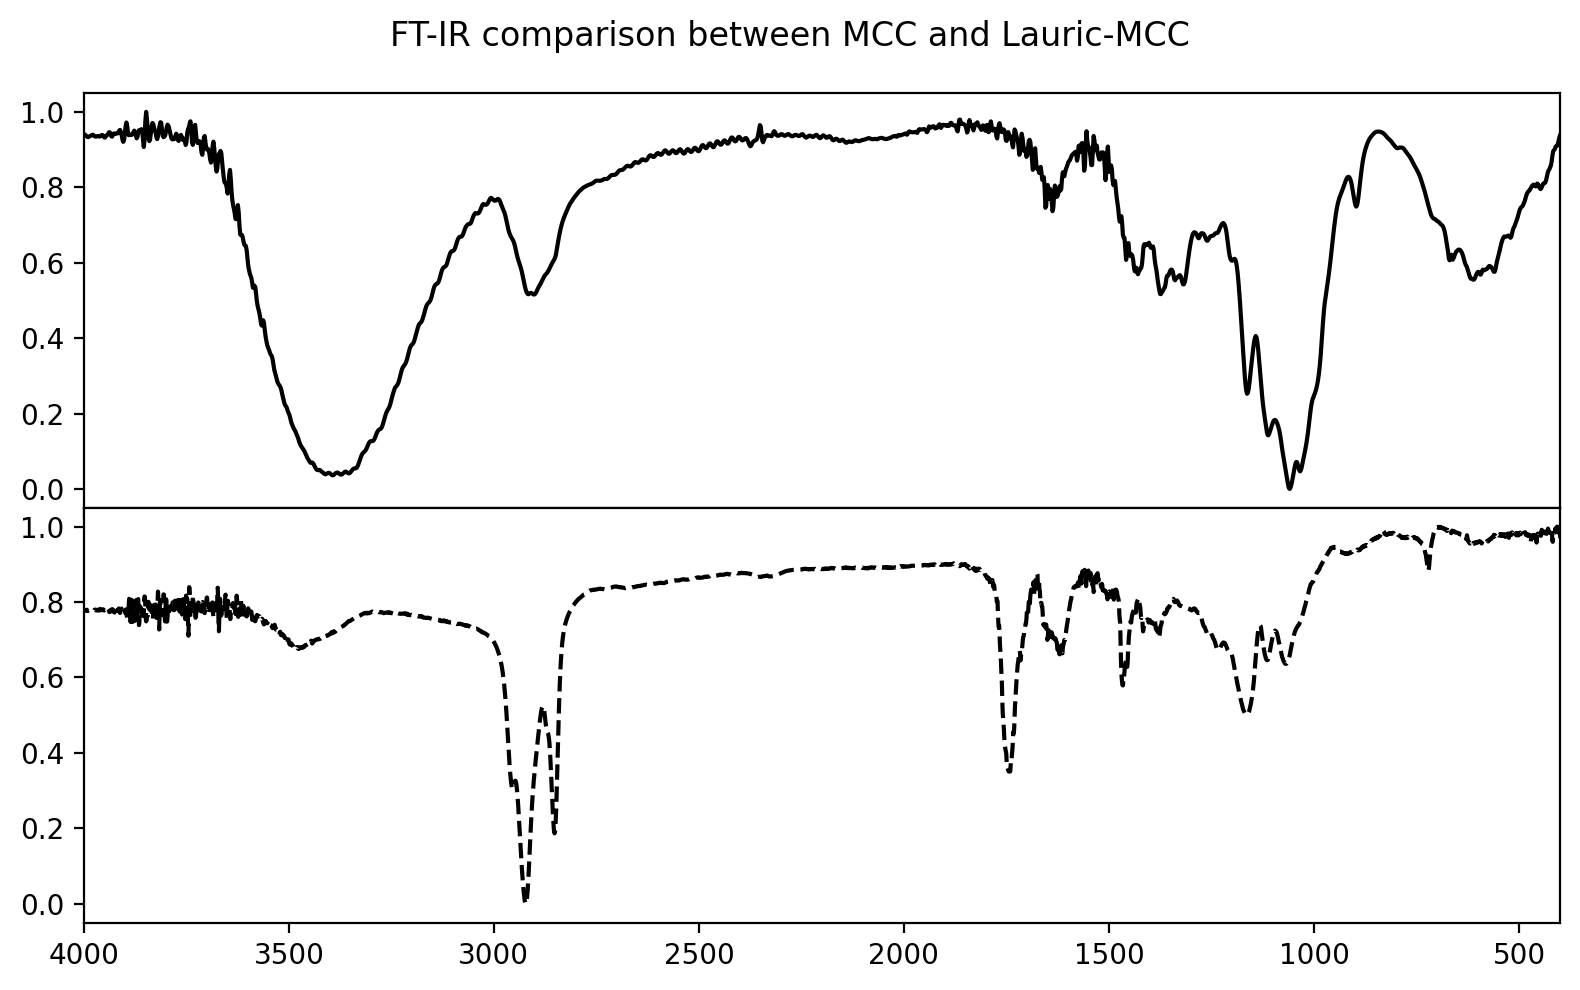

In [141]:
fig = plt.figure(figsize=(8,5), dpi=200)
grid = fig.add_gridspec(2, hspace=0)
axes = grid.subplots(sharex=True, sharey=True)
axes[0].plot(pristine_mcc['Wavelength'], pristine_mcc['Transmittance'], color='black', linestyle='-')
axes[0].set_xlim(4000, 400)
axes[1].plot(jolyg_mcc['Wavenumber'], jolyg_mcc['Transmittance'], color='black', linestyle='--')
axes[1].set_xlim(4000, 400)
fig.suptitle('FT-IR comparison between MCC and Lauric-MCC')
fig.tight_layout()
fig.show()
